# ChatGoogleGenerativeAI

Access Google's `gemini` and `gemini-vision` models, as well as other generative models through `ChatGoogleGenerativeAI` class in the [langchain-google-genai](https://pypi.org/project/langchain-google-genai/) integration package.

In [ ]:
%pip install -U --quiet langchain-google-genai pillow

In [1]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass("Provide your Google API Key")

## Example usage

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [3]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("Write a ballad about LangChain")
print(result.content)

In realms where data streams like fervent tides,
Where algorithms dance and knowledge abides,
A tale unfolds of LangChain, grand and bold,
A ballad sung in bits and bytes untold.

Amidst the codes and circuits' hum,
A spark ignited, a vision would come.
From minds of brilliance, a tapestry formed,
A model to learn, to comprehend, to transform.

In layers deep, its architecture wove,
A neural network, ever-growing, in love.
With language's essence, it sought to entwine,
To unlock the secrets, each word's design.

From texts vast and varied, it feasted and learned,
Its grasp on meaning, swiftly discerned.
Context and syntax, it embraced with grace,
Unraveling stories, at an astonishing pace.

Translations sprang forth, with seamless art,
Bridging tongues and weaving hearts apart.
From English to French, Chinese to Spanish, behold,
LangChain's prowess, like a language untold.

It summarized texts, with insights profound,
Extracting knowledge, without a sound.
Questions it answered, with e

## Streaming and Batching

`ChatGoogleGenerativeAI` natively supports streaming and batching. Below is an example.

In [4]:
for chunk in llm.stream("Write a limerick about LLMs."):
    print(chunk.content)
    print("---")
# Note that each chunk may contain more than one "token"

There once was an AI named Bert,
Whose language skills were quite expert.
---

With a vast dataset,
It could chat, even bet,
And write limericks, for what it's worth.
---


In [5]:
results = llm.batch(
    [
        "What's 2+2?",
        "What's 3+5?",
    ]
)
for res in results:
    print(res.content)

4
8


## Multimodal support

To provide an image, pass a human message with contents of type `List[dict]`, where each dict contains either an image value (type of `image_url`) or a text (type of `text`) value.
The value of `image_url` can be any of the following:

- A public image URL
- An accessible gcs file (e.g., "gcs://path/to/file.png")
- A local file path
- A base64 encoded image (e.g., `data:image/png;base64,abcd124`)
- A PIL image


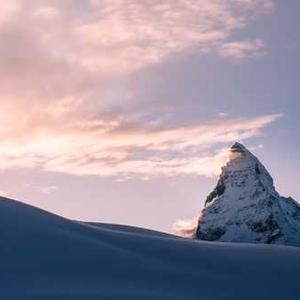

In [6]:
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [7]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)
llm.invoke([message])

AIMessage(content=' The image contains a snow-capped mountain peak.')

## Gemini Prompting FAQs

As of the time this doc was written (2024/12/12), Gemini has some restrictions on the types and structure of prompts it accepts. Specifically:

1. When providing multimodal (image) inputs, you are restricted to at most 1 message of "human" (user) type. You cannot pass multiple messages (though the single human message may have multiple content entries)
2. System messages are not accepted.
3. For regular chat conversations, messages must follow the human/ai/human/ai alternating pattern. You may not provide 2 AI or human messages in sequence.
4. Message may be blocked if they violate the safety checks of the LLM. In this case, the model will return an empty response.